In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
#read the data
data=pd.read_csv('/content/drive/MyDrive/Project 2/Copy of wikihowAll.csv',engine="python", encoding="utf-8")
data.head()

,headline,title,text
0,"\nKeep related supplies in the same area.,\nMa...",How to Be an Organized Artist1,"If you're a photographer, keep all the necess..."
1,\nCreate a sketch in the NeoPopRealist manner ...,How to Create a Neopoprealist Art Work,See the image for how this drawing develops s...
2,"\nGet a bachelor’s degree.,\nEnroll in a studi...",How to Be a Visual Effects Artist1,It is possible to become a VFX artist without...
3,\nStart with some experience or interest in ar...,How to Become an Art Investor,The best art investors do their research on t...
4,"\nKeep your reference materials, sketches, art...",How to Be an Organized Artist2,"As you start planning for a project or work, ..."


In [ ]:
#check for null values
data.isna().sum()

,0
headline,818
title,0
text,1070


In [ ]:
df_cleaned = data.copy()

In [ ]:
#Drop the null values
df_cleaned=df_cleaned.dropna()

In [ ]:
df_cleaned.isnull().sum()

,0
headline,0
title,0
text,0


In [ ]:
import re
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Remove non-alphabet characters, keeping only letters and spaces
df_cleaned['headline'] = df_cleaned['headline'].str.replace(r'[^A-Za-z\s]', ' ', regex=True)
df_cleaned['text'] = df_cleaned['text'].str.replace(r'[^A-Za-z\s]', ' ', regex=True)
#Convert to lowercase
df_cleaned['headline'] = df_cleaned['headline'].str.lower()
df_cleaned['text'] = df_cleaned['text'].str.lower()


In [ ]:
#Strip leading and trailing spaces
df_cleaned['headline'] = df_cleaned['headline'].str.strip()
df_cleaned['text'] = df_cleaned['text'].str.strip()
#Remove stopwords like is was
df_cleaned['headline'] = df_cleaned['headline'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
df_cleaned['text'] = df_cleaned['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
#Replace empty strings with NaN
df_cleaned['headline'].replace('', np.nan, inplace=True)
df_cleaned['text'].replace('', np.nan, inplace=True)

<ipython-input-9-1d48fa16d723>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['headline'].replace('', np.nan, inplace=True)
<ipython-input-9-1d48fa16d723>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
df_cleaned.head()

,headline,title,text
0,keep related supplies area make effort clean d...,How to Be an Organized Artist1,photographer keep necessary lens cords batteri...
1,create sketch neopoprealist manner future mura...,How to Create a Neopoprealist Art Work,see image drawing develops step step however i...
2,get bachelor degree enroll studio based progra...,How to Be a Visual Effects Artist1,possible become vfx artist without college deg...
3,start experience interest art understand diffe...,How to Become an Art Investor,best art investors research pieces art buy som...
4,keep reference materials sketches articles pho...,How to Be an Organized Artist2,start planning project work likely gathering s...


In [ ]:
df_cleaned.iloc[0,2]

'photographer keep necessary lens cords batteries quadrant home studio paints kept brushes cleaner canvas print supplies ink etc make broader groups areas supplies make finding easier limiting search much smaller area ideas include essential supplies area things use every day inspiration reference area dedicated work area infrequent secondary supplies area tucked way mean cleaning entire studio means keeping area immediately around desk easel pottery wheel etc clean night discard trash unnecessary materials wipe dirty surfaces endeavor leave workspace way sit next day start working immediately without work tidying even rest studio bit disorganized organized workspace help get business every time want make art visual people lot artist clutter comes desire keep track supplies visually instead tucked sight using jars old glasses vases cheap clear plastic drawers keep things sight without leaving strewn haphazardly ideas beyond mentioned include canvas shoe racks back door wine racks cups 

In [ ]:
df_cleaned.isna().sum()

,0
headline,7
title,0
text,5177


In [ ]:
df_cleaned=df_cleaned.dropna()

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209110 entries, 0 to 215363
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   headline  209110 non-null  object
 1   title     209110 non-null  object
 2   text      209110 non-null  object
dtypes: object(3)
memory usage: 6.4+ MB


In [ ]:
#Lemmatization
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # Required for better lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df_cleaned['lemmatized headline'] = df_cleaned['headline'].apply(
    lambda text: " ".join([lemmatizer.lemmatize(word) for word in text.split()])
)
df_cleaned['lemmatized text'] = df_cleaned['text'].apply(
    lambda text: " ".join([lemmatizer.lemmatize(word) for word in text.split()])
)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df_cleaned.head()

,headline,title,text,lemmatized headline,lemmatized text
0,keep related supplies area make effort clean d...,How to Be an Organized Artist1,photographer keep necessary lens cords batteri...,keep related supply area make effort clean ded...,photographer keep necessary lens cord battery ...
1,create sketch neopoprealist manner future mura...,How to Create a Neopoprealist Art Work,see image drawing develops step step however i...,create sketch neopoprealist manner future mura...,see image drawing develops step step however i...
2,get bachelor degree enroll studio based progra...,How to Be a Visual Effects Artist1,possible become vfx artist without college deg...,get bachelor degree enroll studio based progra...,possible become vfx artist without college deg...
3,start experience interest art understand diffe...,How to Become an Art Investor,best art investors research pieces art buy som...,start experience interest art understand diffe...,best art investor research piece art buy someo...
4,keep reference materials sketches articles pho...,How to Be an Organized Artist2,start planning project work likely gathering s...,keep reference material sketch article photo e...,start planning project work likely gathering s...


In [ ]:
from transformers import T5Tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [ ]:
def tokenize_function(text, target):
    model_inputs = tokenizer(
        text,
        max_length=512,
        truncation=True,
        padding="max_length"
    )

    with tokenizer.as_target_tokenizer():
        labels = tokenizer(
            target,
            max_length=150,
            truncation=True,
            padding="max_length"
        )

    return model_inputs["input_ids"], model_inputs["attention_mask"], labels["input_ids"]

# Apply tokenization
df_cleaned["input_ids"], df_cleaned["attention_mask"], df_cleaned["labels"] = zip(
    *df_cleaned.apply(lambda row: tokenize_function(row["lemmatized text"], row["lemmatized headline"]), axis=1)
)


/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3961: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [ ]:
df_cleaned.head()

,headline,title,text,lemmatized headline,lemmatized text,input_ids,attention_mask,labels
0,keep related supplies area make effort clean d...,How to Be an Organized Artist1,photographer keep necessary lens cords batteri...,keep related supply area make effort clean ded...,photographer keep necessary lens cord battery ...,"[9050, 453, 1316, 6888, 7496, 3322, 16429, 356...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[453, 1341, 1899, 616, 143, 1941, 1349, 2425, ..."
1,create sketch neopoprealist manner future mura...,How to Create a Neopoprealist Art Work,see image drawing develops step step however i...,create sketch neopoprealist manner future mura...,see image drawing develops step step however i...,"[217, 1023, 5364, 1344, 7, 1147, 1147, 983, 35...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[482, 13278, 3, 29, 15, 32, 9791, 6644, 343, 3..."
2,get bachelor degree enroll studio based progra...,How to Be a Visual Effects Artist1,possible become vfx artist without college deg...,get bachelor degree enroll studio based progra...,possible become vfx artist without college deg...,"[487, 582, 3, 208, 89, 226, 2377, 406, 1900, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[129, 16428, 1952, 17990, 3100, 3, 390, 478, 2..."
3,start experience interest art understand diffe...,How to Become an Art Investor,best art investors research pieces art buy som...,start experience interest art understand diffe...,best art investor research piece art buy someo...,"[200, 768, 12024, 585, 1466, 768, 805, 841, 10...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[456, 351, 1046, 768, 734, 1750, 768, 12501, 7..."
4,keep reference materials sketches articles pho...,How to Be an Organized Artist2,start planning project work likely gathering s...,keep reference material sketch article photo e...,start planning project work likely gathering s...,"[456, 1459, 516, 161, 952, 7241, 7346, 3773, 7...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[453, 2848, 1037, 13278, 1108, 1202, 672, 80, ..."


In [ ]:
df_cleaned.to_csv('cleaned_data.csv', index=False)  # Save without index


In [ ]:
from google.colab import files
files.download('cleaned_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Word Cloud of text ')

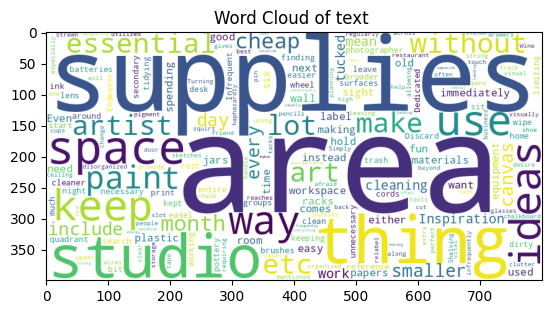

In [ ]:
from os import WCONTINUED
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
text1=data.iloc[0,2]
headline1=data.iloc[0,0]
wc = WordCloud(width=800, height=400, background_color="white").generate(text1)
plt.imshow(wc)
plt.title('Word Cloud of text ')

Text(0.5, 1.0, 'Word Cloud of Headline ')

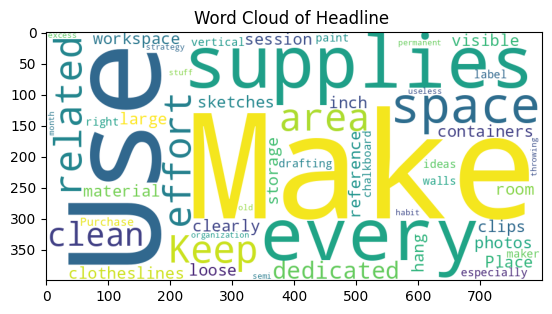

In [ ]:
wc = WordCloud(width=800, height=400, background_color="white").generate(headline1)
plt.imshow(wc)
plt.title('Word Cloud of Headline ')

Text(0.5, 1.0, 'Word Cloud of Lemmatized Text')

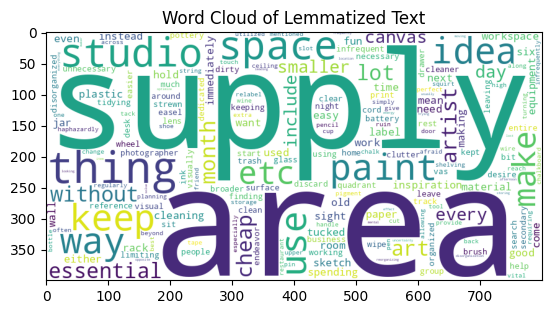

In [ ]:
lemtext=df_cleaned.iloc[0,4]
wc = WordCloud(width=800, height=400, background_color="white").generate(lemtext)
plt.imshow(wc)
plt.title('Word Cloud of Lemmatized Text')